In [5]:
import torch

torch.cuda.is_available()


True

In [30]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import pandas as pd
import scipy
import os

## Check if Dataset is available

In [8]:
f = pyedflib.EdfReader("./data/edf/train/01_tcp_ar/100/00010061/s001_2013_03_30/00010061_s001_t000.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()

dict(zip(np.arange(0, len(signal_labels)), signal_labels))

{0: 'EEG FP1-REF',
 1: 'EEG FP2-REF',
 2: 'EEG F3-REF',
 3: 'EEG F4-REF',
 4: 'EEG C3-REF',
 5: 'EEG C4-REF',
 6: 'EEG P3-REF',
 7: 'EEG P4-REF',
 8: 'EEG O1-REF',
 9: 'EEG O2-REF',
 10: 'EEG F7-REF',
 11: 'EEG F8-REF',
 12: 'EEG T3-REF',
 13: 'EEG T4-REF',
 14: 'EEG T5-REF',
 15: 'EEG T6-REF',
 16: 'EEG A1-REF',
 17: 'EEG A2-REF',
 18: 'EEG FZ-REF',
 19: 'EEG CZ-REF',
 20: 'EEG PZ-REF',
 21: 'EEG ROC-REF',
 22: 'EEG LOC-REF',
 23: 'EEG EKG1-REF',
 24: 'EEG T1-REF',
 25: 'EEG T2-REF',
 26: 'PHOTIC-REF',
 27: 'IBI',
 28: 'BURSTS',
 29: 'SUPPR'}

# Exploratory Data Analysis


## EDF file meta data

In [34]:
print("\nlibrary version: %s" % pyedflib.version.version)

print("\ngeneral header:\n")


print("edfsignals: %i" % f.signals_in_file)
print("file duration: %i seconds" % f.file_duration)
print("startdate: %i-%i-%i" % (f.getStartdatetime().day,f.getStartdatetime().month,f.getStartdatetime().year))
print("starttime: %i:%02i:%02i" % (f.getStartdatetime().hour,f.getStartdatetime().minute,f.getStartdatetime().second))
print("recording: %s" % f.getPatientAdditional())
print("patientcode: %s" % f.getPatientCode())
print("gender: %s" % f.getGender())
print("birthdate: %s" % f.getBirthdate())
print("patient_name: %s" % f.getPatientName())
print("patient_additional: %s" % f.getPatientAdditional())
print("admincode: %s" % f.getAdmincode())
print("technician: %s" % f.getTechnician())
print("equipment: %s" % f.getEquipment())
print("recording_additional: %s" % f.getRecordingAdditional())
print("datarecord duration: %f seconds" % f.getFileDuration())
print("number of datarecords in the file: %i" % f.datarecords_in_file)
print("number of annotations in the file: %i" % f.annotations_in_file)


library version: 0.1.14

general header:

edfsignals: 30
file duration: 1392 seconds
startdate: 30-3-2013
starttime: 16:23:41
recording: 
patientcode: 
gender: 
birthdate: 
patient_name: 
patient_additional: 
admincode: 
technician: 
equipment: 
recording_additional: 
datarecord duration: 1392.000000 seconds
number of datarecords in the file: 1392
number of annotations in the file: 0


In [40]:
channel = 3
print("\nsignal parameters for the %d.channel:\n\n" % channel)

print("label: %s" % f.getLabel(channel))
print("samples in file: %i" % f.getNSamples()[channel])
print("physical maximum: %f" % f.getPhysicalMaximum(channel))
print("physical minimum: %f" % f.getPhysicalMinimum(channel))
print("digital maximum: %i" % f.getDigitalMaximum(channel))
print("digital minimum: %i" % f.getDigitalMinimum(channel))
print("physical dimension: %s" % f.getPhysicalDimension(channel))
print("prefilter: %s" % f.getPrefilter(channel))
print("transducer: %s" % f.getTransducer(channel))
print("samplefrequency: %f" % f.getSampleFrequency(channel))



signal parameters for the 3.channel:


label: EEG F4-REF
samples in file: 348000
physical maximum: 4999.847000
physical minimum: -4999.840000
digital maximum: 32767
digital minimum: -32767
physical dimension: uV
prefilter: HP:0.000 Hz LP:0.0 Hz N:0.0
transducer: Unknown
samplefrequency: 250.000000


In [37]:
sampling_freq=f.getSampleFrequency(8)
signal_data=f.readSignal(8)

#time 
t=np.arange(0,len(signal_data))/sampling_freq

#dataframe of singal and time
df= pd.DataFrame({'Flow': signal_data,'Time': t})
df.head()

read -1, less than 348000 requested!!!


,Flow,Time
0,0.0,0.000
1,0.0,0.004
2,0.0,0.008
3,0.0,0.012
4,0.0,0.016


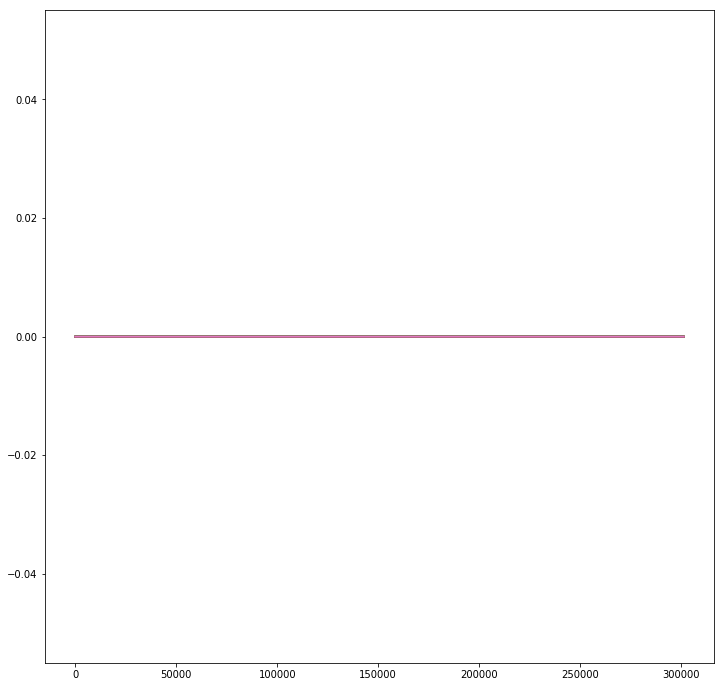

In [38]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(12, 12))
for i in range(n-3):
    plt.plot(np.arange(1, sigbufs.shape[1]+1), sigbufs[i])

In [44]:
signal_labels = f.getSignalLabels()
sigbufs = [np.zeros(f.getNSamples()[i]) for i in np.arange(n)]
for i in np.arange(n):
    sigbufs[i] = f.readSignal(i)

read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000 requested!!!
read -1, less than 348000

In [6]:
from stacklineplot import stackplot

In [9]:

n = f.signals_in_file
signal_labels = f.getSignalLabels()
n_min = f.getNSamples()[0]
sigbufs = [np.zeros(f.getNSamples()[i]) for i in np.arange(n)]
for i in np.arange(n):
    sigbufs[i] = f.readSignal(i)
    if n_min < len(sigbufs[i]):
        n_min = len(sigbufs[i])
f._close()
del f

n_plot = np.min((n_min, 2000))
sigbufs_plot = np.zeros((n, n_plot))
for i in np.arange(n):
    sigbufs_plot[i,:] = sigbufs[i][:n_plot]

stackplot(sigbufs_plot[:, :n_plot], ylabels=signal_labels)

ValueError: could not broadcast input array from shape (1392) into shape (2000)